In [9]:
df <- read.csv(file = 'jdp_views_test.csv')
head(df)

,jdp_visits,user_token
,<int>,<chr>
1,0,js_1814393
2,3,js_658987
3,0,js_534686
4,2,js_332088
5,5,js_313533
6,1,js_206410


In [2]:
## Using mixture models for density estimation in the galaxies dataset
## Compare kernel density estimation, and estimates from mixtures of KK=6 
## components obtained using both frequentist and Bayesian procedures
rm(list=ls())

In [8]:
# # Install MCMCpack package
# install.packages("MCMCpack")

In [5]:
### Loading data and setting up global variables
library(MASS)
library(MCMCpack)

Loading required package: coda

##
## Markov Chain Monte Carlo Package (MCMCpack)

## Copyright (C) 2003-2023 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park

##
## Support provided by the U.S. National Science Foundation

## (Grants SES-0350646 and SES-0350613)
##



In [10]:
KK = 6          # Based on the description of the dataset
x  = df$jdp_visits
n  = length(x)
set.seed(781209)

[1] "1 -1851.59203961121"
[1] "2 -1858.13615776922"
[1] "3 -1833.92055786093"
[1] "4 -1800.39772761736"
[1] "5 -1775.9130660742"
[1] "6 -1763.5995430847"
[1] "7 -1758.08831771586"
[1] "8 -1755.20803960738"
[1] "9 -1753.06501787179"
[1] "10 -1750.95353740221"
[1] "11 -1748.64522381873"
[1] "12 -1746.08835585116"
[1] "13 -1743.29537046916"
[1] "14 -1740.30256865374"
[1] "15 -1737.15583244152"
[1] "16 -1733.90526933523"
[1] "17 -1730.60262607001"
[1] "18 -1727.29933057682"
[1] "19 -1724.04452528259"
[1] "20 -1720.88304478034"
[1] "21 -1717.85352593793"
[1] "22 -1714.98690681445"
[1] "23 -1712.30553759193"
[1] "24 -1709.82302723698"
[1] "25 -1707.54481911112"
[1] "26 -1705.46936499848"
[1] "27 -1703.58968129329"
[1] "28 -1701.89503940911"
[1] "29 -1700.37256315657"
[1] "30 -1699.00856405602"
[1] "31 -1697.78952119946"
[1] "32 -1696.70268683254"
[1] "33 -1695.73635914793"
[1] "34 -1694.87990278431"
[1] "35 -1694.12361347168"
[1] "36 -1693.45851859595"
[1] "37 -1692.87618574412"
[1] "38 -169

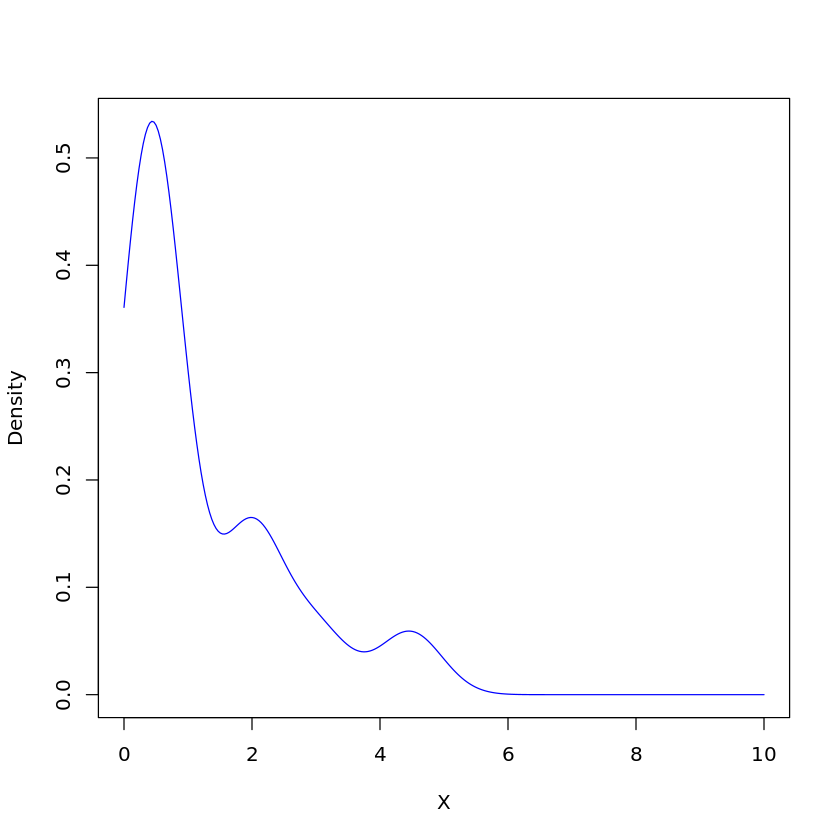

In [12]:
# Assuming x contains your data and KK is the number of components
# Make sure x is within the range of 0 to 10; you might want to filter or clip values here
x <- x[x >= 0 & x <= 10]
n <- length(x)
KK <- 6  # Number of components

# Initialize the parameters with values closer to zero
w = rep(1, KK) / KK
mu = seq(0, 10, length.out = KK)  # Within the range of 0 to 10
sigma = sd(x) / sqrt(KK)

epsilon = 0.000001
s = 0
sw = FALSE
KL = -Inf
KL.out = NULL

while(!sw) {
  # E step
  v = array(0, dim = c(n, KK))
  for (k in 1:KK) {
    v[, k] = log(w[k]) + dnorm(x, mu[k], sigma, log = TRUE)
  }
  for (i in 1:n) {
    v[i, ] = exp(v[i, ] - max(v[i, ])) / sum(exp(v[i, ] - max(v[i, ])))
  }
  
  # M step
  # Weights
  w = apply(v, 2, mean)
  mu = rep(0, KK)
  for (k in 1:KK) {
    for (i in 1:n) {
      mu[k] = mu[k] + v[i, k] * x[i]
    }
    mu[k] = mu[k] / sum(v[, k])
  }
  # Standard deviations
  sigma = 0
  for (i in 1:n) {
    for (k in 1:KK) {
      sigma = sigma + v[i, k] * (x[i] - mu[k]) ^ 2
    }
  }
  sigma = sqrt(sigma / sum(v))
  
  # Check convergence
  KLn = 0
  for (i in 1:n) {
    for (k in 1:KK) {
      KLn = KLn + v[i, k] * (log(w[k]) + dnorm(x[i], mu[k], sigma, log = TRUE))
    }
  }
  if (abs(KLn - KL) / abs(KLn) < epsilon) {
    sw = TRUE
  }
  KL = KLn
  KL.out = c(KL.out, KL)
  s = s + 1
  print(paste(s, KLn))
}

# Generate a sequence for density prediction
xx = seq(0, 10, length.out = 300)  # xx values from 0 to 10
density.EM = rep(0, length(xx))
for (s in 1:length(xx)) {
  for (k in 1:KK) {
    density.EM[s] = density.EM[s] + w[k] * dnorm(xx[s], mu[k], sigma)
  }
}

# Plotting
plot(xx, density.EM, type = "l", col = "blue", xlab = "X", ylab = "Density")


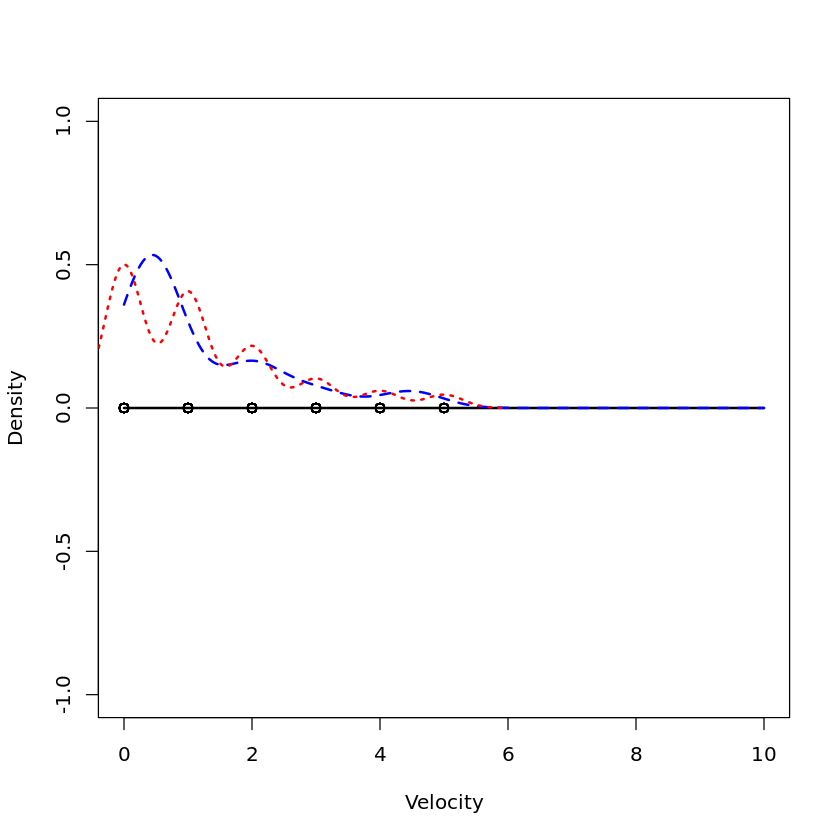

In [13]:
## Plot Bayesian estimate with pointwise credible bands along with kernel density estimate and frequentist point estimate
colscale = c("black", "blue", "red")
yy = density(x)
density.mcmc.lq = apply(density.mcmc, 2, quantile, 0.025)
density.mcmc.uq = apply(density.mcmc, 2, quantile, 0.975)
plot(xx, density.mcmc.m, type="n",ylim=c(0,max(density.mcmc.uq)),xlab="Velocity", ylab="Density")
polygon(c(xx,rev(xx)), c(density.mcmc.lq, rev(density.mcmc.uq)), col="grey", border="grey")
lines(xx, density.mcmc.m, col=colscale[1], lwd=2)
lines(xx, density.EM, col=colscale[2], lty=2, lwd=2)
lines(yy, col=colscale[3], lty=3, lwd=2)
points(x, rep(0,n))
legend(27000, 0.00017, c("KDE","EM","MCMC"), col=colscale[c(3,2,1)], lty=c(3,2,1), lwd=2, bty="n")
